# 프로젝트명 : 1주차 제조데이터 실습코드

### 📌 프로젝트 소개

- 제품 및 공장의 불량률을 나타내는 제조 데이터는 민감한 정보이므로 기업이 공개적으로 공유하지 않는 경우가 많습니다.
- 그럼에도 불구하고 제조 공정의 불량률을 줄이거나 개선하는 데 도움이 될 수 있으므로 중요한 데이터입니다.
- 실제로 현장에서의 목표는 일반적인 데이터 분석처럼 단순히 고성능 예측 모델을 개발하는 것이 아닙니다. 대신 `어떤 요인이 결함에 영향을 미치는지 이해하고 이를 줄이기 위한 효과적인 전략을 결정`하는 데 중점을 둡니다.
- 따라서 데이터 분석가의 임무는 `다양한 데이터를 분석하고 제품 불량 발생률을 줄일 수 있는 솔루션을 제공`하는 것입니다.


### ✅ 데이터 안내
- 본 실습에 사용된 데이터는 실제 제조과정에서 나온 데이터로 익명처리되어 어느 회사의 제품인지 식별이 불가능합니다.
- 제조업 데이터를 다루다 보면 제조업 분야에서 흔히 발생하는 `데이터 불균형`을 자주 접하게 됩니다.
- 비식별화된 제조 데이터에서 `종속변수 Y`는 `제품의 불량 여부`를 나타냅니다.
- X로 표시된 나머지 변수는 독립변수입니다.
|


![워크플로우](https://file.notion.so/f/f/4e4750b9-2973-47f2-9fe5-8330ce1f2c19/475398a6-c3b8-4335-aa31-21706433bb30/%E1%84%91%E1%85%B3%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%8B%E1%85%AF%E1%84%8F%E1%85%B3.png?id=394533fb-064a-49a7-b2a8-8ef44889237d&table=block&spaceId=4e4750b9-2973-47f2-9fe5-8330ce1f2c19&expirationTimestamp=1715745600000&signature=6FQpuNkoG-UJfp-FiIfFnwlPC7A7iDe-0RR1PbO-ixg&downloadName=%E1%84%91%E1%85%B3%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%8B%E1%85%AF%E1%84%8F%E1%85%B3.png)

## EDA

In [2]:
import pandas as pd

# Load the data
file_path = 'data/1주_실습데이터.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527000 entries, 0 to 526999
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      527000 non-null  float64
 1   X2      527000 non-null  float64
 2   X3      527000 non-null  float64
 3   X4      527000 non-null  float64
 4   X5      527000 non-null  float64
 5   X6      527000 non-null  float64
 6   X7      527000 non-null  float64
 7   X8      527000 non-null  float64
 8   X9      527000 non-null  float64
 9   X10     527000 non-null  float64
 10  X11     527000 non-null  float64
 11  X12     527000 non-null  float64
 12  X13     527000 non-null  float64
 13  X14     527000 non-null  float64
 14  X15     527000 non-null  float64
 15  X16     527000 non-null  float64
 16  X17     527000 non-null  float64
 17  X18     527000 non-null  float64
 18  X19     527000 non-null  float64
 19  X20     527000 non-null  float64
 20  Y       527000 non-null  int64  
dtypes: float64

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,0.202296,0.003560,0.411261,0.015348,0.693147,0.036360,0.343512,0.028087,0.681974,0.295769,...,0.682731,0.249262,0.681974,0.016330,0.242926,0.557461,0.028087,0.682731,0.036360,0
1,0.006836,0.007688,0.597304,0.015348,0.686838,0.067407,0.347869,0.028640,0.497403,0.297943,...,0.680891,0.249262,0.497403,0.670040,0.245876,0.561336,0.028640,0.680891,0.067407,0
2,0.609621,0.001461,0.466186,0.015348,0.693090,0.018944,0.345032,0.024502,0.647685,0.298255,...,0.685525,0.249262,0.647685,0.648486,0.243602,0.559431,0.024502,0.685525,0.018944,0
3,0.074007,0.003072,0.535876,0.015348,0.693147,0.031475,0.347502,0.025393,0.587787,0.296057,...,0.677980,0.249262,0.575364,0.632563,0.246078,0.556761,0.025393,0.677980,0.031475,0
4,0.198356,0.007020,0.416238,0.015348,0.686838,0.061888,0.347441,0.028450,0.537143,0.298167,...,0.673286,0.249262,0.537143,0.671124,0.245505,0.561695,0.028450,0.673286,0.061888,0


In [5]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
count,527000.000000,527000.000000,527000.000000,5.270000e+05,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,...,527000.000000,5.270000e+05,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000
mean,0.375129,0.003963,0.455679,1.534800e-02,0.638446,0.037449,0.348374,0.025152,0.602939,0.299989,...,0.680077,2.492619e-01,0.601662,0.603826,0.247010,0.559367,0.025152,0.680077,0.037449,0.108159
std,0.200043,0.004316,0.105150,2.081670e-17,0.139334,0.016994,0.028971,0.003820,0.071272,0.033502,...,0.005244,1.387780e-16,0.065753,0.165551,0.030353,0.013077,0.003820,0.005244,0.016994,0.310582
min,0.000000,0.000000,0.000000,1.534800e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.492619e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.204692,0.002366,0.415990,1.534800e-02,0.688810,0.026023,0.344457,0.024164,0.562785,0.295929,...,0.676136,2.492619e-01,0.562785,0.623615,0.243377,0.556788,0.024164,0.676136,0.026023,0.000000
50%,0.399744,0.003523,0.435739,1.534800e-02,0.693147,0.034280,0.345721,0.025805,0.624154,0.296921,...,0.680586,2.492619e-01,0.612178,0.645785,0.244290,0.557708,0.025805,0.680586,0.034280,0.000000
75%,0.545196,0.005094,0.530429,1.534800e-02,0.693147,0.048085,0.346949,0.028069,0.659246,0.297723,...,0.684354,2.492619e-01,0.647685,0.668555,0.245254,0.559589,0.028069,0.684354,0.048085,0.000000
max,0.693147,0.693147,0.693147,1.534800e-02,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,...,0.693147,2.492619e-01,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.000000


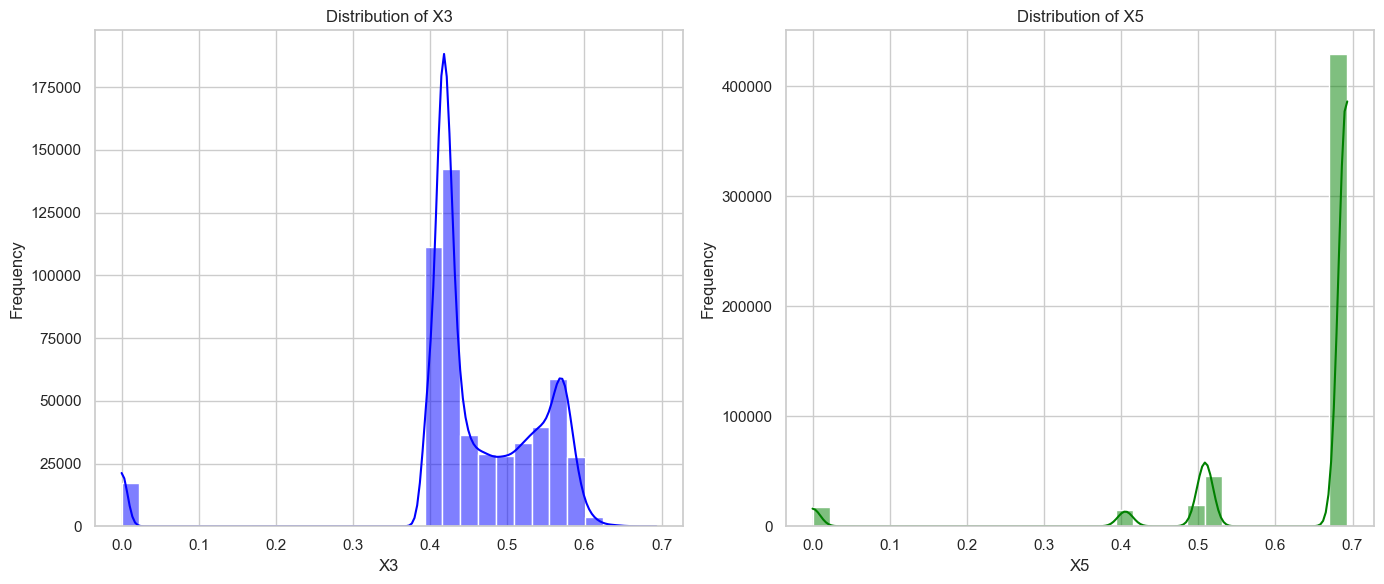

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of X3
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['X3'], kde=True, color='blue', bins=30)
plt.title('Distribution of X3')
plt.xlabel('X3')
plt.ylabel('Frequency')

# Plot the distribution of X5
plt.subplot(1, 2, 2)
sns.histplot(data['X5'], kde=True, color='green', bins=30)
plt.title('Distribution of X5')
plt.xlabel('X5')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
# Count the number of zeros in X3 and X5
x3_zeros = (data['X3'] == 0).sum()
x5_zeros = (data['X5'] == 0).sum()

x3_zeros, x5_zeros

(17360, 17358)

In [8]:
x3_zeros/len(data)

0.03294117647058824

## 데이터 전처리

In [9]:
# 결측치 제거
# Drop rows where any column except X3 and X5 has a zero
columns_to_check = [col for col in data.columns if col not in ['X3', 'X5', 'Y']]
filtered_data = data[~(data[columns_to_check] == 0).any(axis=1)]
# Verify the changes
initial_shape = data.shape
final_shape = filtered_data.shape
initial_shape, final_shape

((527000, 21), (526955, 21))

In [10]:
### 전처리 단계
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 독립 변수(X)와 종속 변수(Y) 분리
X = data.drop('Y', axis=1)
y = data['Y']

# 클래스 분포 확인
print(y.value_counts())

# 불균형 데이터 처리 (SMOTE 적용)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 데이터 스케일링
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=42)

0    470000
1     57000
Name: Y, dtype: int64


훈련 세트 크기: (752000, 20)
테스트 세트 크기: (188000, 20)


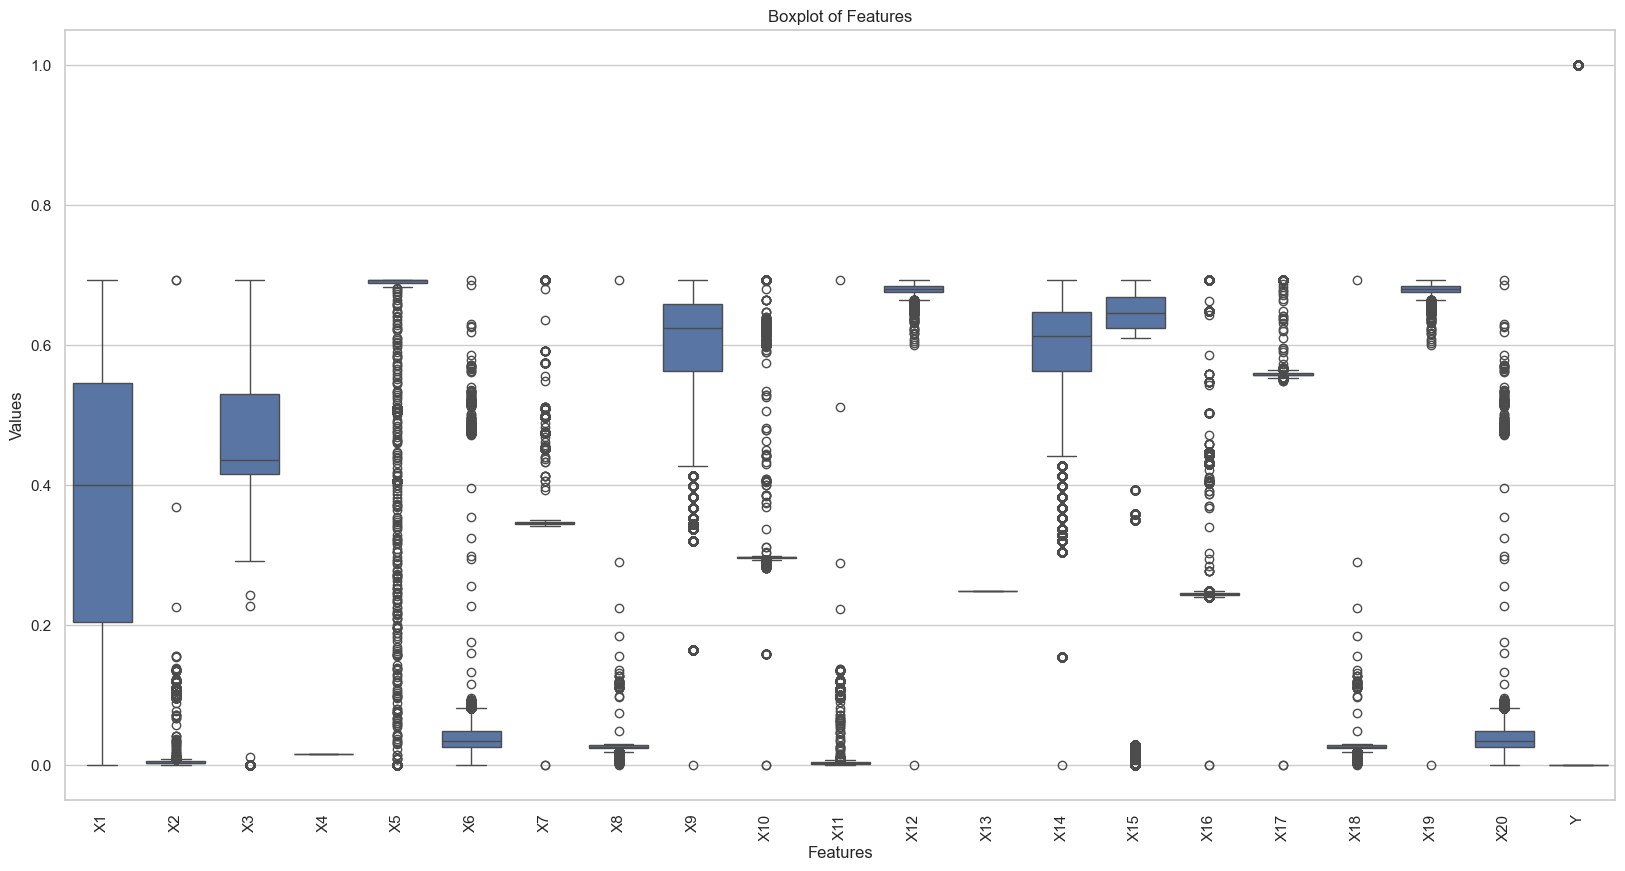

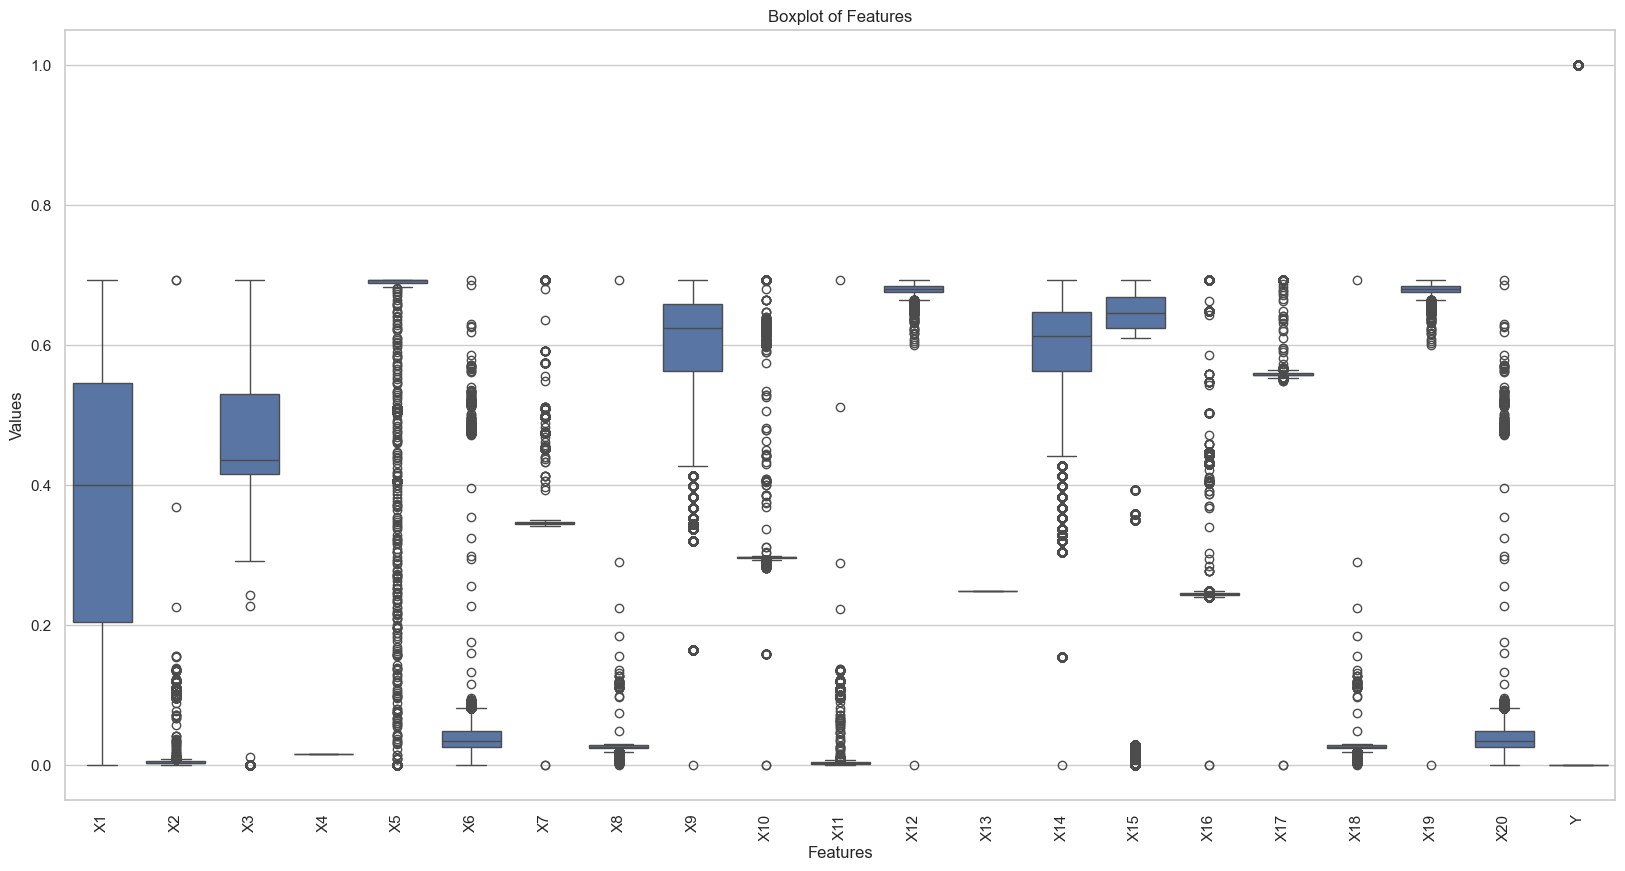

유의미한 변수와 그 p-value: {'X1': (-70.30807921646321, 0.0), 'X3': (-530.6963378178239, 0.0), 'X4': (-238.74627469599275, 0.0), 'X5': (-363.07997948403397, 0.0), 'X6': (-52.977658592401276, 0.0), 'X7': (192.7418351611659, 0.0), 'X8': (-209.10196858936263, 0.0), 'X9': (-135.78715507998953, 0.0), 'X10': (207.52070564960147, 0.0), 'X11': (27.394396762116504, 4.179606541487487e-165), 'X12': (97.01707851707238, 0.0), 'X13': (-297.30820401392066, 0.0), 'X14': (-153.80845372163506, 0.0), 'X15': (41.56030879681651, 0.0), 'X16': (181.4389275716712, 0.0), 'X17': (191.51698911962387, 0.0), 'X18': (-209.10196858936263, 0.0), 'X19': (97.01707851707238, 0.0), 'X20': (-52.977658592401276, 0.0)}


C:\Users\USER\AppData\Local\Temp\ipykernel_18744\2652716491.py:34: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(defective[column], non_defective[column])


In [11]:
# 결과 출력
print(f'훈련 세트 크기: {X_train.shape}')
print(f'테스트 세트 크기: {X_test.shape}')

#### 다음은 각 변수에 대해 박스플롯을 그려서 이상치를 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 시각화
plt.figure(figsize=(20, 10))
data_melted = data.melt(var_name='Features', value_name='Values')
sns.boxplot(x='Features', y='Values', data=data_melted)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
# 박스플롯 시각화
plt.figure(figsize=(20, 10))
data_melted = data.melt(var_name='Features', value_name='Values')
sns.boxplot(x='Features', y='Values', data=data_melted)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

from scipy.stats import ttest_ind
# 불량 제품과 정상 제품의 분리
defective = data[data['Y'] == 1]
non_defective = data[data['Y'] == 0]
# 각 변수에 대한 t-test 수행
ttest_results = {}
for column in data.columns[:-1]:  # 마지막 열 Y는 제외
    t_stat, p_value = ttest_ind(defective[column], non_defective[column])
    ttest_results[column] = (t_stat, p_value)
# p-value가 0.05 이하인 변수만 출력 (유의미한 차이가 있는 변수)
significant_features = {k: v for k, v in ttest_results.items() if v[1] < 0.05}
print("유의미한 변수와 그 p-value:", significant_features)